In [ ]:
# Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. 
# Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution 
# through a user-friendly mobile app to enable shared, solo and sustainable commuting.

#Business Problem:
# The company wants to know:
# Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
# How well those variables describe the electric cycle demands

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm,binom,geom
from scipy.stats import ttest_1samp,ttest_ind,ttest_rel,chi2,chisquare,chi2_contingency
from scipy.stats import f,f_oneway,kruskal,shapiro,levene
from scipy.stats import pearsonr,spearmanr

In [133]:
df = pd.read_csv('original_bike_sharing.csv')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [134]:
#Provides structural summary of a dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
# To check the shape of the dataframe 
df.shape

(10886, 12)

In [10]:
#Describes numerical data and provides a statistical summary  
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [17]:
#Checks for null values for each column and returns the sum
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [135]:
#converts datatype of datetime column from object to datetime64
df['datetime'] = pd.to_datetime(df['datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [95]:
#oncvert the datatype of the categorical columns from int to category
to_cat= ['season', 'holiday', 'workingday', 'weather']
for col in to_cat:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB


In [75]:
#Get the total counts of workingday based on the grouping  
df['workingday'].value_counts()

workingday
1    7412
0    3474
Name: count, dtype: int64

In [23]:
#Get the total count of weather based on the grouping 
df['weather'].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [24]:
#Get the total count of season based on the grouping 
df['season'].value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

In [25]:
#Get the total count of holiday based on the grouping 
df['holiday'].value_counts()

holiday
0    10575
1      311
Name: count, dtype: int64

In [203]:
#Percentage of casual users
df['casual'].sum()/df['count'].sum()*100

18.8031413451893

In [204]:
#Percentage of registered users
df['registered'].sum()/df['count'].sum()*100

81.1968586548107

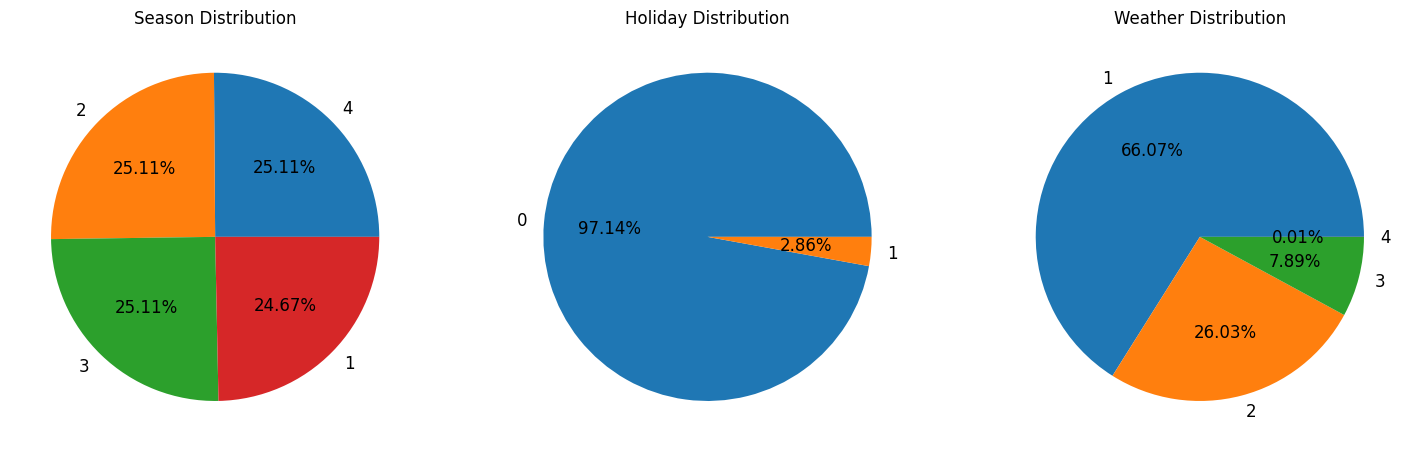

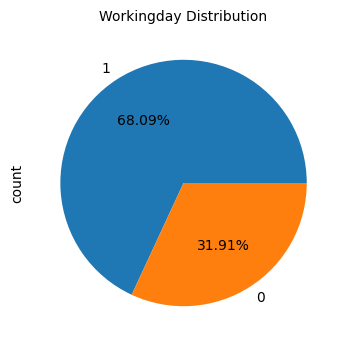

In [36]:
# Distribution of categorical variables using pie chart
# Univariate Analysis using pie chart for the numerical and categorical variables

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 12))
data = df['season'].value_counts()*100
axs[0].pie(x=data.values, labels=data.index, autopct='%1.2f%%',textprops={'fontsize': 12})
axs[0].set_title("Season Distribution")

data = df['holiday'].value_counts()*100
axs[1].pie(x=data.values, labels=data.index, autopct='%1.2f%%',textprops={'fontsize': 12})
axs[1].set_title("Holiday Distribution")

data = df['weather'].value_counts()*100
axs[2].pie(x=data.values, labels=data.index, autopct='%1.2f%%',textprops={'fontsize': 12})
axs[2].set_title("Weather Distribution")

plt.show()


plt.figure(figsize=(4,4))
df['workingday'].value_counts().plot(kind='pie',autopct='%1.2f%%',textprops={'fontsize': 10})
plt.title('Workingday Distribution',fontsize=10)
plt.show()
  

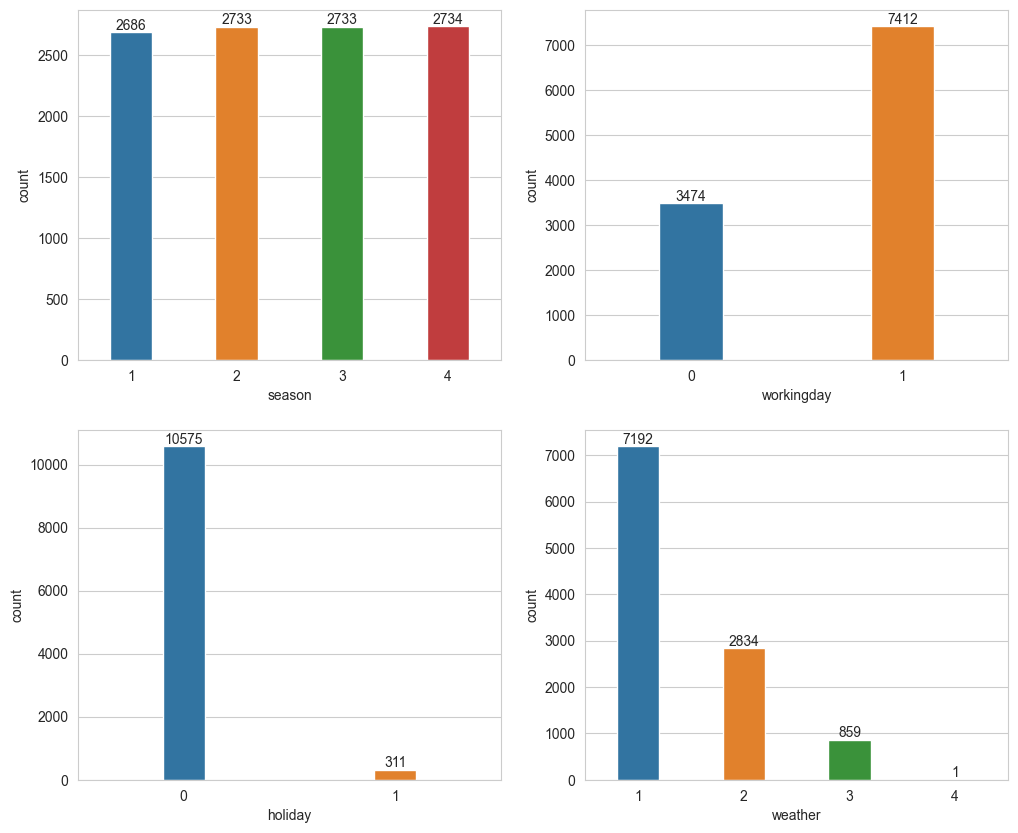

In [142]:
# Univariate Analysis using countplot for the numerical and categorical variables

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
ax1=sns.countplot(data=df, x='season',width=0.4, ax=axs[0,0])
ax1.bar_label(ax1.containers[0])
ax2 = sns.countplot(data=df, x='workingday', width=0.3, ax=axs[0,1])
ax2.bar_label(ax2.containers[0])
ax3 = sns.countplot(data=df, x='holiday',width=0.2, ax=axs[1,0])
ax3.bar_label(ax3.containers[0])
ax4=sns.countplot(data=df, x='weather',width=0.4, ax=axs[1,1])
ax4.bar_label(ax4.containers[0])
plt.show()

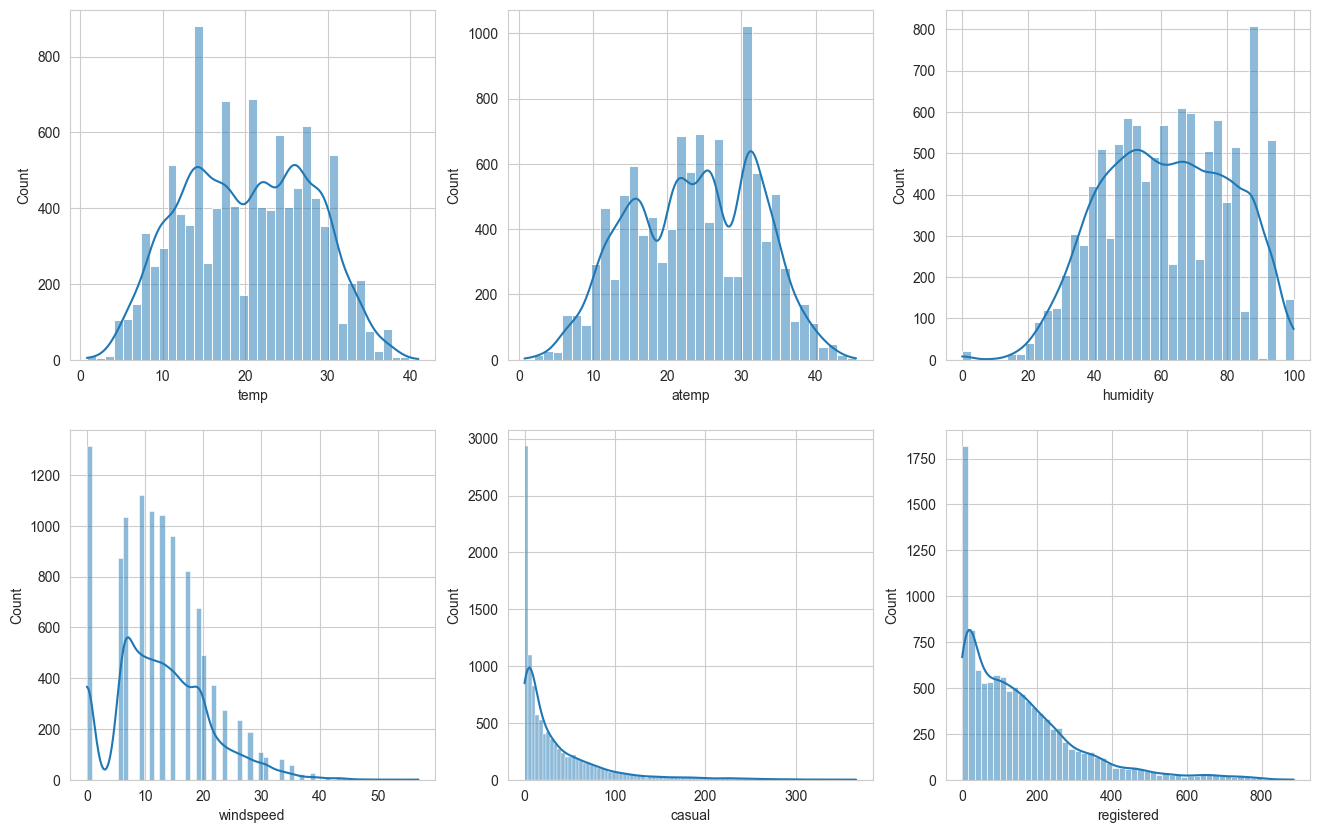

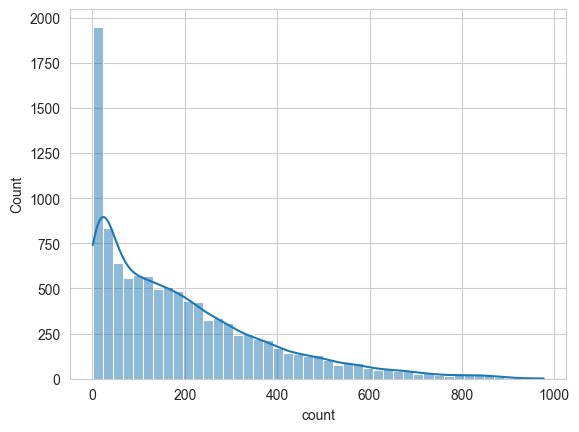

In [144]:
# understanding the distribution for numerical variables

fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))

cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']

index = 0
for row in range(2):
    for col in range(3):
        sns.histplot(df[cols[index]], ax1=axis[row,col], kde=True)
        index += 1
        
plt.show()
sns.histplot(df[cols[-1]], kde=True) 
plt.show()

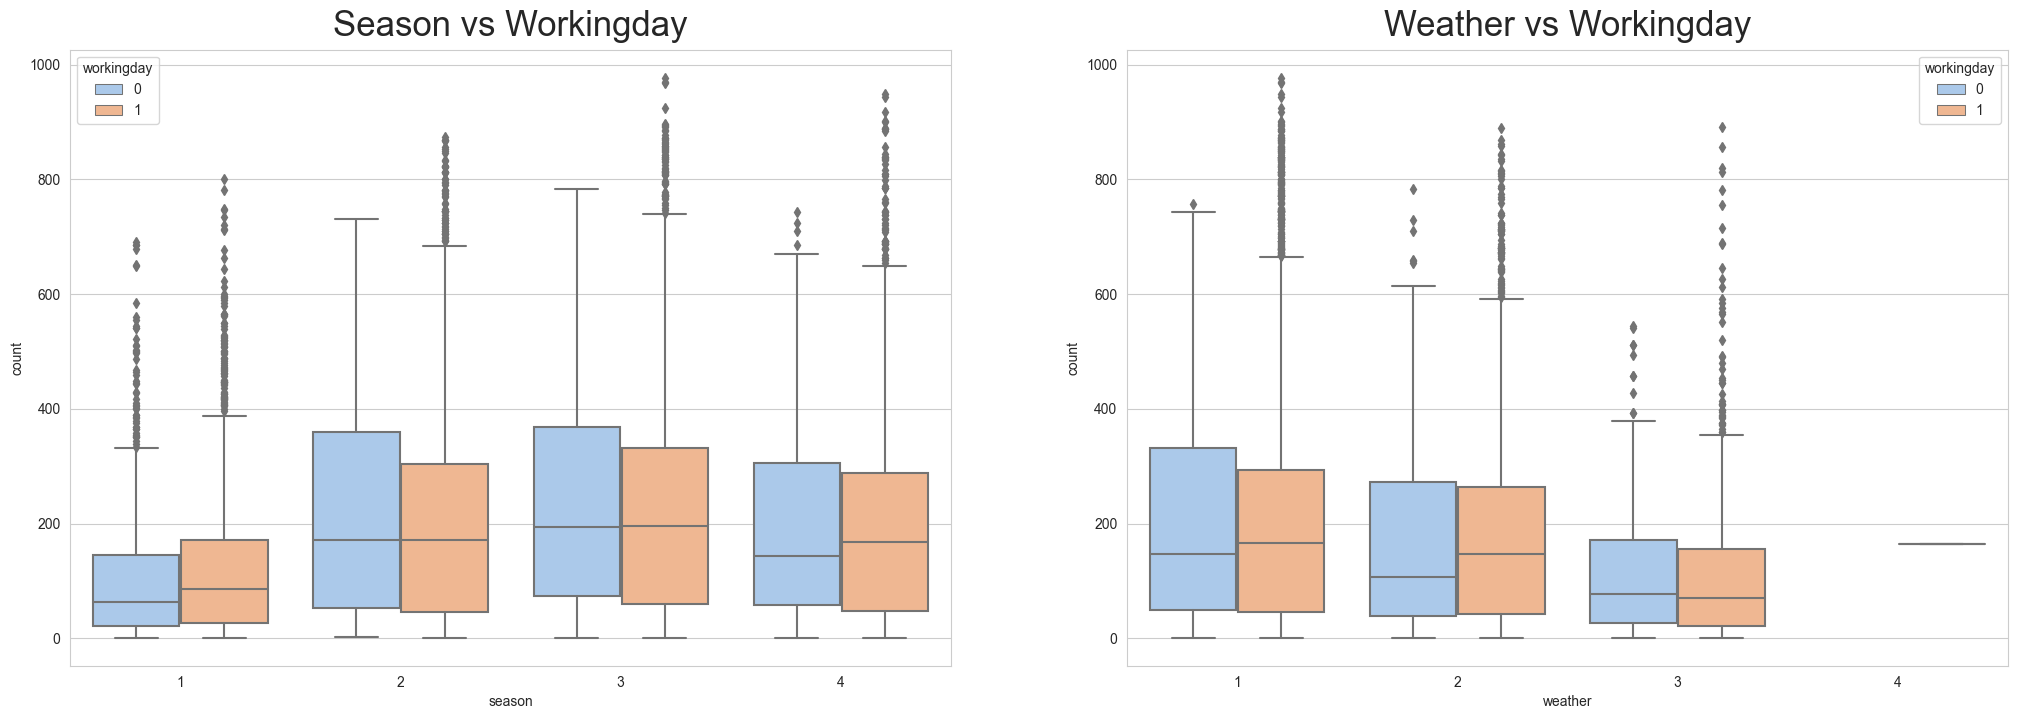

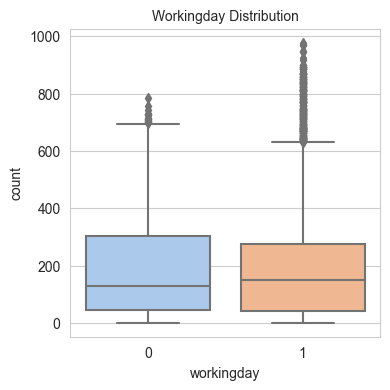

In [107]:
#Bivariate Analysis using boxplots
# season (1: spring, 2: summer, 3: fall, 4: winter)
# weather(1: clear/partly cloudy , 2: Mist/cloudy, 3: Light rain, 4: Heavy Rain/Thunderstorms)

sns.set_style(style='whitegrid')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(25,8))
axs1 = sns.boxplot(data=df, x='season', y='count', hue='workingday', width=0.8 , palette='pastel', ax=axs[0])
axs2 = sns.boxplot(data=df, x='weather',y='count', hue='workingday', width=0.8, palette='pastel', ax=axs[1])
axs[0].set_title("Season vs Workingday", pad=10, fontsize=25)
axs[1].set_title("Weather vs Workingday", pad=10, fontsize=25)

plt.figure(figsize=(4,4))
sns.boxplot(data=df, x='workingday',y='count', width=0.8, palette='pastel')
plt.title('Workingday Distribution',fontsize=10)
plt.show()


[]

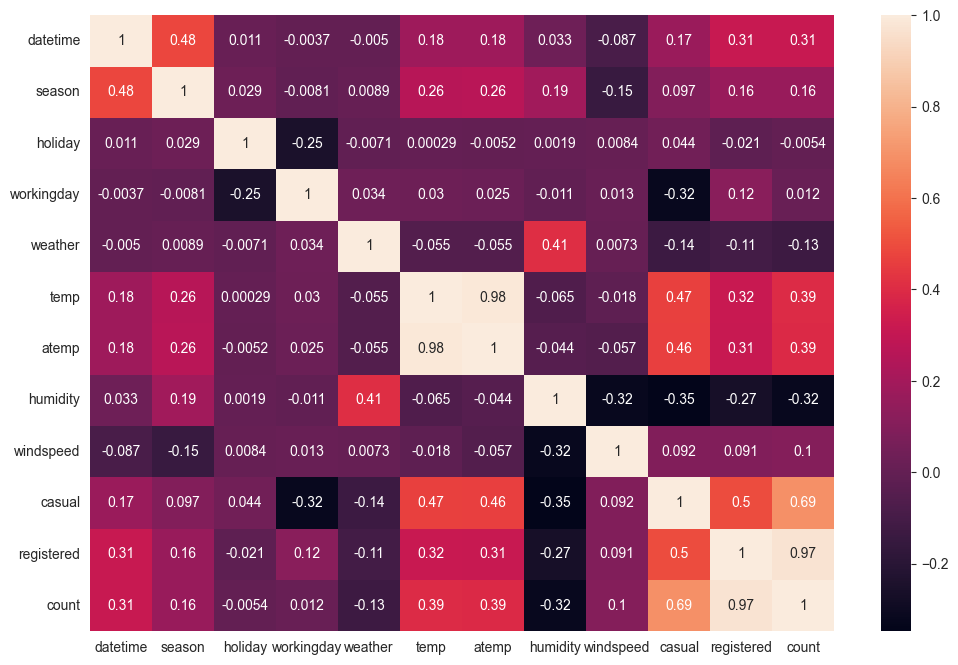

In [143]:
#Shows how data values are correlated with every other variable in the table
plt.figure(figsize = (12, 8))
sns.heatmap(df.corr(),annot=True)
plt.plot()


In [ ]:
# Hypothesis Testing
# 2-Sample T-Test to check if Working Day has an effect on the number of electric cycles rented

# Null Hypothesis: Working day has no effect on the number of cycles rented.
# Alternate Hypothesis: Working day has effect on the number of cycles rented.
# Significance level (alpha): 0.05

In [90]:
# Extracting values of count column data for each Working day and create groups for the ttest

wk1 = df[df['workingday']==0]['count'].values
wk2 = df[df['workingday']==1]['count'].values

t_statistic,p_value = ttest_ind(wk1,wk2, alternative="two-sided")
print("t_statistic:",t_statistic)
print("p_value:",p_value)
alpha=0.05
if(p_value<alpha):
    print("Interpretation: Reject Null hypothesis")
else:
    print("Interpretation: Fail to Reject Null hypothesis")


t_statistic: -1.2096277376026694
p_value: 0.22644804226361348
Interpretation: Fail to Reject null hypothesis


[]

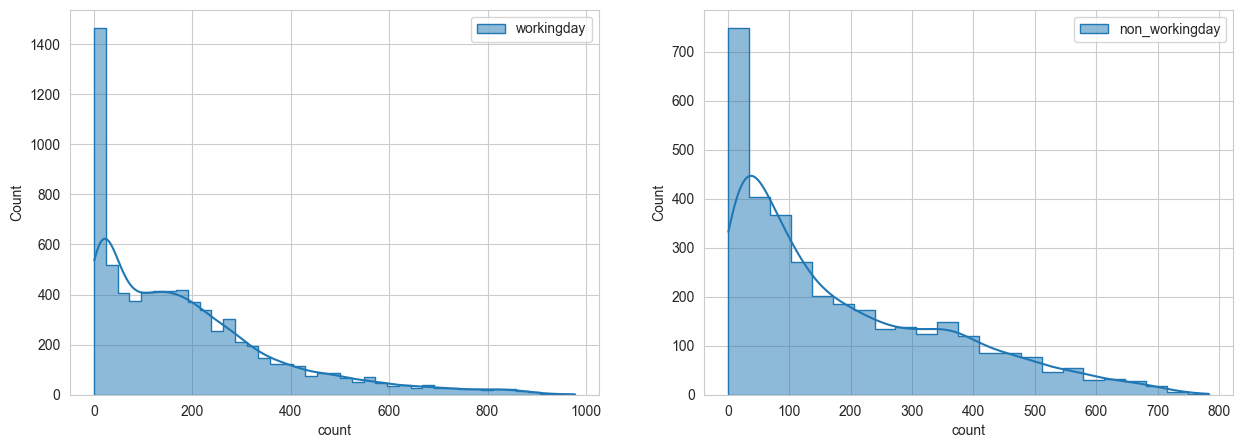

In [150]:
# Histogram plot to check if the samples follow normal distribution

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df.loc[df['workingday'] == 1, 'count'], 
             element = 'step', kde = True, label = 'workingday')
plt.legend()
plt.subplot(1, 2, 2)
sns.histplot(df.loc[df['workingday'] == 0, 'count'], 
             element = 'step', kde = True, label = 'non_workingday')
plt.legend()
plt.plot()

In [ ]:
#Hypothesis Testing Setup
# ANNOVA to check if No. of cycles rented is similar or different in different 1. weather 2. season

# Null Hypothesis: Number of cycles rented is similar in different weather and season.
# Alternate Hypothesis: Number of cycles rented is not similar in different weather and season.

# Significance level (alpha): 0.05


In [152]:
# Extracting values of count column data for each weather and season and create groups for the ANOVA

we1 = df[df['weather']==1]['count'].values
we2 = df[df['weather']==2]['count'].values
we3 = df[df['weather']==3]['count'].values
we4 = df[df['weather']==4]['count'].values

se1 = df[df['season']==1]['count'].values
se2 = df[df['season']==2]['count'].values
se3 = df[df['season']==3]['count'].values
se4 = df[df['season']==4]['count'].values

f_stat,p_value = f_oneway(we1, we2, we3, we4, se1, se2, se3, se4)
print("f_Stat:",f_stat)
print("p_value:",p_value)
alpha = 0.05
if p_value<alpha:
    print("Interpretation: Reject Null hypothesis")
else:
    print("Interpretation: Fail to Reject Null hypothesis")

f_Stat: 127.96661249562491
p_value: 2.8074771742434642e-185
Interpretation: Reject Null hypothesis


[]

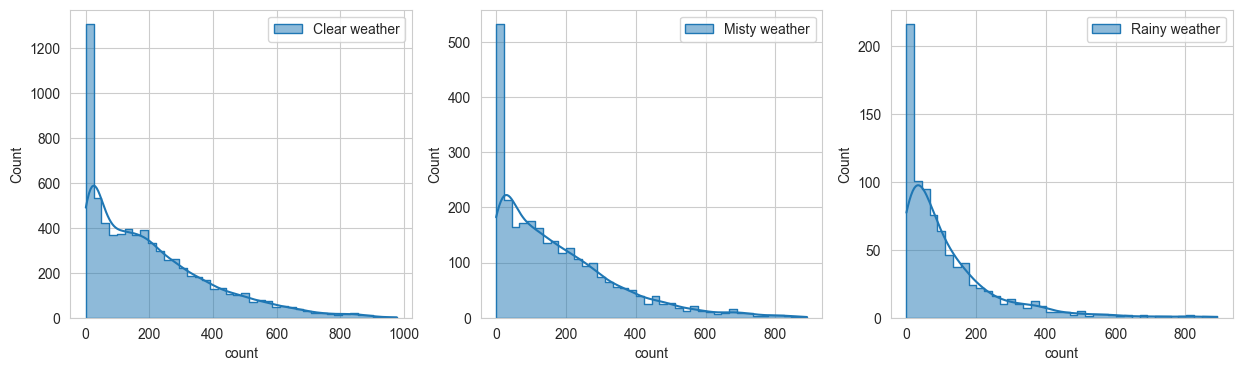

In [168]:
# Histogram plot to check if the samples follow normal distribution

df_weather1 = df[df['weather'] == 1]
df_weather2 = df[df['weather'] == 2]
df_weather3 = df[df['weather'] == 3]
df_weather4 = df[df['weather'] == 4]

plt.figure(figsize = (15, 4))
plt.subplot(1, 3, 1)
sns.histplot(df_weather1['count'], bins = 40,element = 'step', kde = True, label = 'Clear weather')
plt.legend()
plt.subplot(1, 3, 2)
sns.histplot(df_weather2['count'], bins = 40,element = 'step', kde = True, label = 'Misty weather')
plt.legend()
plt.subplot(1, 3, 3)
sns.histplot(df_weather3['count'], bins = 40,element = 'step', kde = True, label = 'Rainy weather')
plt.legend()
plt.plot()

In [ ]:
# Hypothesis Testing Setup
# Chi-square test to check if Weather is dependent on the season

# Null Hypothesis (H0): Weather is independent on the season
    # Alternate Hypothesis (H1): Weather is dependent on the season

# Significance level (alpha): 0.05


In [157]:
# Extracting values of count column data for each weather and season and create groups for the ANOVA

df_tab = pd.crosstab(df['season'], df['weather'])

chi_stat,p_value,dof,expected = chi2_contingency(df_tab)
print("chi_stat:", chi_stat)
print("p-value:",p_value)
print("dof:",dof)
print("expected:",expected)
alpha=0.05
if(p_value<alpha):
    print("Interpretation: Reject Null hypothesis")
else:
    print("Interpretation: Fail to Reject Null hypothesis")

chi_stat: 49.158655596893624
p-value: 1.549925073686492e-07
dof: 9
expected: [[1.77454639e+03 6.99258130e+02 2.11948742e+02 2.46738931e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80625831e+03 7.11754180e+02 2.15736359e+02 2.51148264e-01]]
Interpretation: Reject Null hypothesis


[]

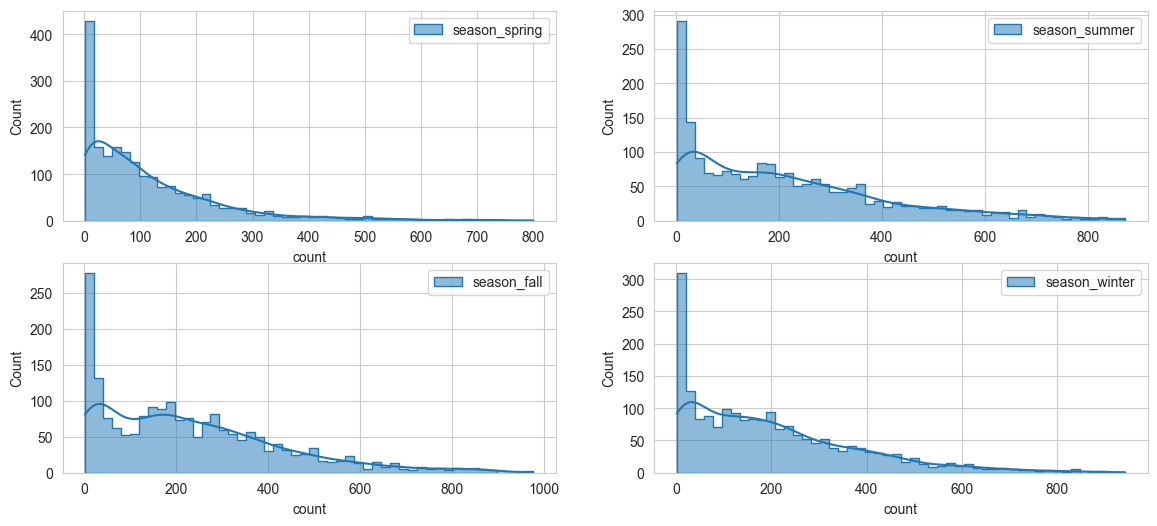

In [171]:
# Histogram plot to check if the samples follow normal distribution

df_spring = df.loc[df['season'] == 1, 'count']
df_summer = df.loc[df['season'] == 2, 'count']
df_fall = df.loc[df['season'] == 3, 'count']
df_winter = df.loc[df['season'] == 4, 'count']

plt.figure(figsize = (14, 6))
plt.subplot(2, 2, 1)
sns.histplot(df_spring.sample(2000), bins = 50, element = 'step', kde = True, label = 'season_spring')
plt.legend()
plt.subplot(2, 2, 2)
sns.histplot(df_summer.sample(2000), bins = 50,element = 'step', kde = True, label = 'season_summer')
plt.legend()
plt.subplot(2, 2, 3)
sns.histplot(df_fall.sample(2000), bins = 50,element = 'step', kde = True, label = 'season_fall')
plt.legend()
plt.subplot(2, 2, 4)
sns.histplot(df_winter.sample(2000), bins = 50, element = 'step', kde = True, label = 'season_winter')
plt.legend()
plt.plot()